# Tutorials


### MNIST

Resources:
- tensorflow docs for [MNIST tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html)
- 3 notebooks that come with this docker image

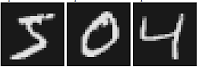

In [1]:

from IPython.display import Image
import base64
with open('mnist-img.txt', 'r') as myfile:
    data=myfile.read().replace('\n', '')
    #print type(data)
    #print data
Image(data=base64.decodestring(data))


---

### Temporary code from tutorial
```python
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

x = tf.placeholder(tf.float32, [None, 784])
#print type(x)

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #data sets seem to block jupyter kernel
                            #3_mnist_from_scratch.ipynb - should check other source
#print type(mnist)

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
```